In [1]:
import cv2
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import random

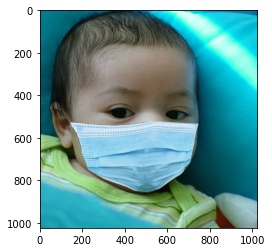

In [2]:
directory = "dataset/"
classes = ["with-mask","without-mask"]
for i in classes:
    path = os.path.join(directory, i)
    for img in os.listdir(path):
        img_ar = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_ar, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

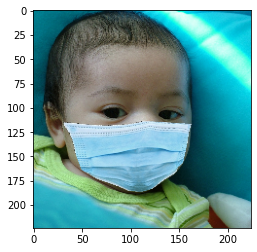

In [3]:
img_size = 224
new_ar = cv2.resize(img_ar, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_ar, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
train = []
def training_data():
    for c in classes:
        path = os.path.join(directory, c)
        class_num = classes.index(c)
        for img in os.listdir(path):
            try:
                img_ar = cv2.imread(os.path.join(path, img))
                new_ar = cv2.resize(img_ar, (img_size,img_size))
                train.append([new_ar,class_num])
            except:
                pass
            

In [5]:
training_data()

In [6]:
print(len(train))

1950


In [7]:
random.shuffle(train)

In [8]:
x = []
y  = []
for features, label in train:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
x.shape

(1950, 224, 224, 3)

In [10]:
x = x/255.0 # normalizing data

In [11]:
import pickle

pick_out = open("x.pickle","wb")
pickle.dump(x, pick_out)
pick_out.close()

pick_out = open("y.pickle","wb")
pickle.dump(y, pick_out)
pick_out.close()

In [12]:
pick_in = open("x.pickle","rb")
x = pickle.load(pick_in)
pick_in = open("y.pickle","rb")
y = pickle.load(pick_in)

In [13]:
# y.shape

In [14]:
from tensorflow import keras
from tensorflow.keras import layers

In [15]:
model = tf.keras.applications.mobilenet.MobileNet()

In [16]:
# model.summary()

In [17]:
inp = model.layers[0].input
out = model.layers[-4].output

In [18]:
flat_layer = layers.Flatten()(out)
final_out = layers.Dense(1)(flat_layer)
final_out = layers.Activation('sigmoid')(final_out)

In [19]:
new_model = keras.Model(inputs = inp, outputs = final_out)

In [20]:
# new_model.summary()

In [21]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics =["accuracy"])

In [22]:
new_model.fit(x, y, epochs = 1, validation_split=0.1)

55/55 [==============================] - 157s 3s/step - loss: 0.0331 - accuracy: 0.9840 - val_loss: 4.5568e-10 - val_accuracy: 1.0000


In [23]:
new_model.save("mask.h5")

## Testing the model uploading images manually

In [24]:
new_model = tf.keras.models.load_model("mask.h5")

In [25]:
test1 = cv2.imread("dataset/00000_Mask.jpg")

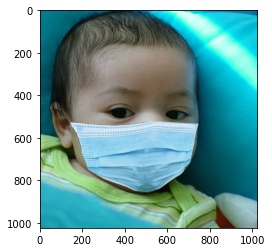

In [26]:
plt.imshow(cv2.cvtColor(test1, cv2.COLOR_BGR2RGB))
plt.show()

In [27]:
final_img = cv2.resize(test1, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/255.0

In [28]:
pred = new_model(final_img)

In [29]:
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.5932182e-14]], dtype=float32)>

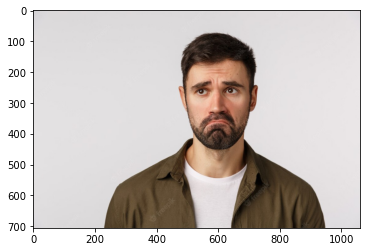

In [30]:
test2 = cv2.imread("dataset/guy.jpg")
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
faceCas = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

In [32]:
grey = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)

In [33]:
faces = faceCas.detectMultiScale(grey, 1.1, 4)
for x,y,w,h in faces:
    roi_grey = grey[y:y+h, x:x+w]
    roi_color = test2[y:y+h, x:x+w]
    
    cv2.rectangle(test2, (x,y), (x+w,y+h), (0,0,255), 2)
    f = faceCas.detectMultiScale(roi_grey)
    if len(f) == 0:
        print("Face not detected")
    else:
        for(cx,cy,cw,ch) in f:
            face = roi_color[cy:cy+ch, cx:cx+cw]

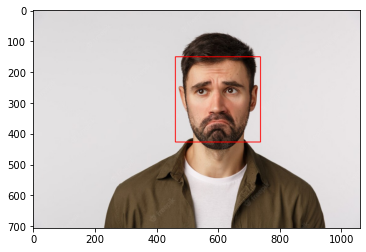

In [34]:
plt.imshow(cv2.cvtColor(test2, cv2.COLOR_BGR2RGB))

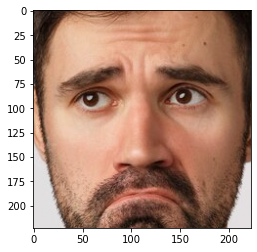

In [35]:
plt.imshow(cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

In [36]:
final_img = cv2.resize(face, (224,224))
final_img = np.expand_dims(final_img, axis = 0)
final_img = final_img/255.0 

In [37]:
pred = new_model(final_img)

In [38]:
pred

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.]], dtype=float32)>

## Real time implementation

In [39]:
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_COMPLEX

In [40]:
img = np.zeros((500,500), 'uint8')

text = "empty"

# (text_width, text_height) = cv2.getTextSize(text, font, fontScale = font_scale, thickness = 1)[0]

In [41]:
# text_offset_x = 10
# text_offset_y = img[0] - 25
# box_coords =((text_offset_x,text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))

In [42]:
cap = cv2.VideoCapture(0)

In [43]:
# if not cap.isOpened():
#     cap = cv2.VideoCapture(0)
# if not cap.isOpened():
#     raise IOError("Cam not found")

In [44]:
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
    
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        fa = faceCas.detectMultiScale(roi_gray)
        
        if len(fa) == 0:
            print("Face not detected")
        else:
            for(cx,cy,cw,ch) in fa:
                face = roi_color[cy:cy+ch, cx:cx+cw]
                
    final_img = cv2.resize(face, (224,224))
    final_img = np.expand_dims(final_img, axis = 0)
    final_img = final_img/255.0 
    font = cv2.FONT_HERSHEY_COMPLEX
    pred = new_model(final_img)
    
    if (pred > 0.5):
        status = "No Mask"
        
        x1,y1,w1,h1= 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/15),y1+int(y1/4)), font, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
        
    else:
        status = "Mask on"
        
        x1,y1,w1,h1= 0,0,175,75
#         cv2.rectangle(frame, (x1,y1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/15),y1+int(y1/4)), font, 0.7, (0,255,0), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,255,0), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
        
        
    
    cv2.imshow("Face mask detection", frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

        
cap.release()
cv2.destroyAllWindows()
        
                
        
            

Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
Face not detected
